In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [2]:
pwd

'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification'

In [5]:
input_path = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\ten-crops-somas-vs-neurites'

In [6]:
img_list = os.listdir(input_path)

In [6]:
img_mean_list = []
for img in img_list:
    current_img_path = os.path.join(input_path, img)
    current_img = cv2.imread(current_img_path, -1)
    current_img_mean = np.mean(current_img)
    img_mean_list.append([img, current_img_mean])
    
print(img_mean_list)



[['PID20190102_SB11-15-Plate1_T0_0_A6_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_13.tif', 4303.3829], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_4.tif', 6423.929255555556], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_5.tif', 6867.268944444444], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_6.tif', 4680.988], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_8.tif', 4155.003811111111], ['PID20190102_SB11-15-Plate2_T0_0_A4_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_3.tif', 6883.173155555555], ['PID20190102_SB11-15-Plate2_T0_0_A4_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_5.tif', 5463.2187], ['PID20190102_SB11-15-Plate2_T0_0_B1_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_4.tif', 11864.157966666668], ['PID20190102_SB11-15-Plate2_T0_0_B3_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_2.tif', 5374.6169222222225], ['PID20190102_SB11-15-Plate2_T0_0_B4_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_13.tif', 4556.825133333334]]


In [7]:
img_mean_list_class1 = [fn for fn in img_mean_list if 'Plate1' in fn[0]]
print(img_mean_list_class1)

img_mean_list_class2 = [fn for fn in img_mean_list if 'Plate2' in fn[0]]
img_mean_list_class2

[['PID20190102_SB11-15-Plate1_T0_0_A6_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_13.tif', 4303.3829], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_4.tif', 6423.929255555556], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_5.tif', 6867.268944444444], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_6.tif', 4680.988], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_8.tif', 4155.003811111111]]


[['PID20190102_SB11-15-Plate2_T0_0_A4_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_3.tif',
  6883.173155555555],
 ['PID20190102_SB11-15-Plate2_T0_0_A4_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_5.tif',
  5463.2187],
 ['PID20190102_SB11-15-Plate2_T0_0_B1_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_4.tif',
  11864.157966666668],
 ['PID20190102_SB11-15-Plate2_T0_0_B3_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_2.tif',
  5374.6169222222225],
 ['PID20190102_SB11-15-Plate2_T0_0_B4_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_13.tif',
  4556.825133333334]]

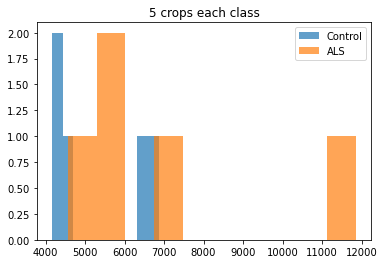

In [93]:
img_mean_list_class1_values = [i[1] for i in img_mean_list_class1]
img_mean_list_class2_values = [j[1] for j in img_mean_list_class2]
plt.title("5 crops each class")
plt.hist(img_mean_list_class1_values, bins=10, range=(np.min(img_mean_list_class1_values),
                                                          np.max(img_mean_list_class1_values)),
             label='Control', alpha=0.7)
plt.hist(img_mean_list_class2_values, bins=10, range=(np.min(img_mean_list_class2_values),
                                                          np.max(img_mean_list_class2_values)),
             label='ALS', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

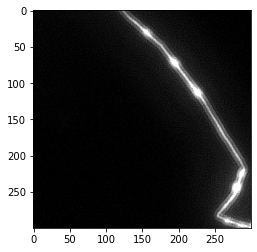

In [66]:
current_img_path = os.path.join(input_path, img_list[0])
current_img = cv2.imread(current_img_path)
plt.imshow(current_img)

img normalized mean:  0.06455054466230938
img normalized std dev:  0.1411150439993513


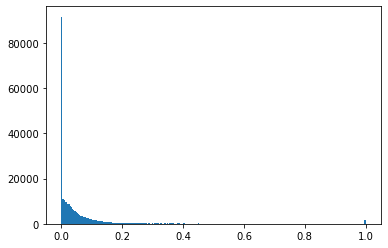

In [91]:
current_img_normalized = (current_img - current_img.min()) / (current_img.max() - current_img.min())
plt.hist(current_img_normalized.ravel(), bins=256)
current_img_normalized_mean = current_img_normalized.mean()
current_img_normalized_std = current_img_normalized.std()
print("img normalized mean: ", current_img_normalized_mean)
print("img normalized std dev: ", current_img_normalized_std)

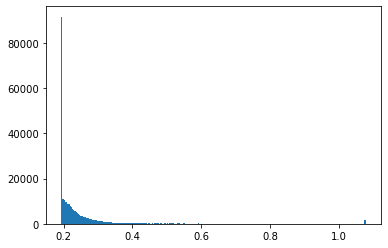

In [83]:
mean_correction_factor = 0.25 - current_img_normalized_mean
stdDev_correction_factor = 0.125 / current_img_normalized_std
current_img_standardized = (current_img_normalized - mean_correction_factor) * stdDev_correction_factor
current_img_standardized_corrected = current_img_standardized + (0.25 - current_img_standardized.mean())
plt.hist(current_img_standardized_corrected.ravel(), bins=256)
print("img standardized mean: ", current_img_normalized_mean)
print("img standardized std dev: ", current_img_normalized_std)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


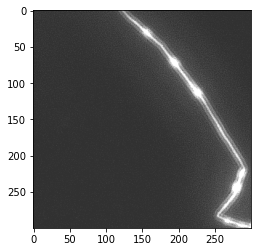

In [87]:
plt.imshow(current_img_standardized_corrected)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


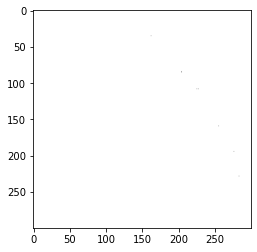

In [89]:
current_img_standardized_clipped = current_img_standardized_corrected.clip(0.2, 0.9)
current_img_standardized_clipped_int16 = np.array(current_img_standardized_corrected * pow(2, 16), dtype=np.uint16)
plt.imshow(current_img_standardized_clipped_int16)

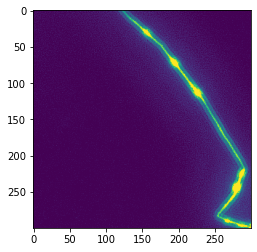

In [10]:
imgray = cv2.cvtColor(current_img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)

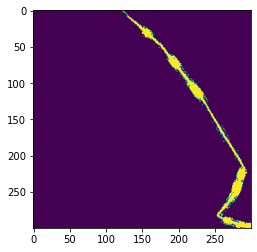

In [11]:
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
plt.imshow(thresh)

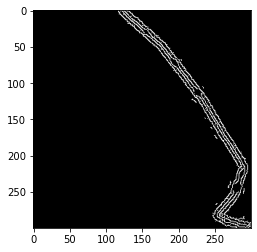

In [12]:
edges = cv2.Canny(current_img, 100, 200)
plt.imshow(edges, cmap='gray')

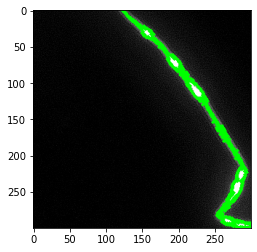

In [13]:
countours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.drawContours(current_img, countours, -1, (0,255,0), 3))


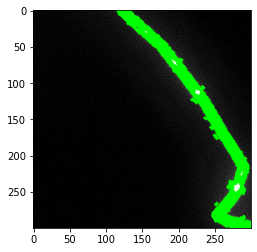

In [28]:
countours_canny, hierarchy_canny = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt_canny = countours_canny[0]
plt.imshow(cv2.drawContours(current_img, countours_canny, -1, (0,255,0), 3))


[[[269 294]]

 [[270 293]]

 [[271 294]]

 [[270 295]]]
{'m00': 2.0, 'm10': 540.0, 'm01': 588.0, 'm20': 145800.3333333333, 'm11': 158760.0, 'm02': 172872.3333333333, 'm30': 39366270.0, 'm21': 42865298.0, 'm12': 46675530.0, 'm03': 50824662.0, 'mu20': 0.3333333333139308, 'mu11': 0.0, 'mu02': 0.3333333333139308, 'mu30': 1.4901161193847656e-08, 'mu21': 5.704350769519806e-09, 'mu12': 5.238689482212067e-09, 'mu03': 1.4901161193847656e-08, 'nu20': 0.0833333333284827, 'nu11': 0.0, 'nu02': 0.0833333333284827, 'nu30': 2.634178031930877e-09, 'nu21': 1.008396277848539e-09, 'nu12': 9.26078214350699e-10, 'nu03': 2.634178031930877e-09}


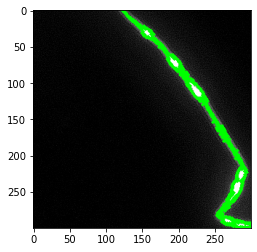

In [14]:
contours_mom, hierarchy_mom = cv2.findContours(thresh, 1, 2)
# plt.imshow(cv2.drawContours(current_img, contours_mom, -1, (0,255,0), 3))
cnt = contours_mom[0]
M = cv2.moments(cnt)
print(cnt)
print(M)
plt.imshow(cv2.drawContours(current_img, cnt, -1, (0,255,0), thickness=3))

In [15]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print("centroid is x and y is: ", cx, cy)

centroid is x and y is:  270 294


In [16]:
print(contours_mom[0])

[[[269 294]]

 [[270 293]]

 [[271 294]]

 [[270 295]]]


In [17]:
area = cv2.contourArea(cnt)
print("The contour area is: ", area)

The contour area is:  2.0


In [29]:
area_canny = cv2.contourArea(cnt_canny)
print("The canny contour area is: ", area_canny)

The canny contour area is:  1.0


In [31]:
perimeter = np.round(cv2.arcLength(cnt, True), 2)
print("The contour perimeter is: ", perimeter)
perimeter_canny = np.round(cv2.arcLength(cnt_canny, True), 2)
print("The Canny contour perimeter is: ", perimeter_canny)

The contour perimeter is:  5.66
The Canny contour perimeter is:  4.83


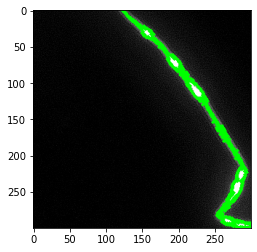

In [19]:
# Contour approximation: 
epsilon = 0.01 * perimeter
approx = cv2.approxPolyDP(cnt, epsilon, True)
plt.imshow(cv2.drawContours(current_img, approx, -1, (0,255,0), thickness=1))

the hull are:  [[[271 294]]

 [[270 295]]

 [[269 294]]

 [[270 293]]]


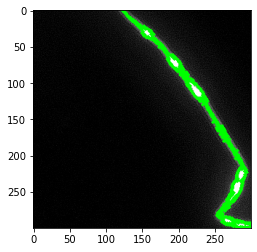

In [24]:
hull = cv2.convexHull(cnt)
print("the hull are: ", hull)
plt.figure("img convex hull")
plt.imshow(cv2.drawContours(current_img, hull, 0, (0,255,0), thickness=1))